In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
dataset.shape

(1156, 7)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [13]:
dataset['PURPOSE*'].fillna("NOT", inplace=True)

In [15]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [19]:
dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'], 
                                       errors='coerce')
dataset['END_DATE*'] = pd.to_datetime(dataset['END_DATE*'], 
                                     errors='coerce')

In [23]:
from datetime import datetime

dataset['Date'] = pd.DatetimeIndex(dataset['START_DATE*']).date
dataset['Time'] = pd.DatetimeIndex(dataset['START_DATE*']).hour

#changing into categories of day and night
dataset['Day-Night'] = pd.cut(x=dataset['Time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [25]:
dataset.dropna(inplace=True)

In [27]:
dataset.drop_duplicates(inplace=True)


In [29]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY*': 2, 'START*': 108, 'STOP*': 112, 'PURPOSE*': 7, 'Date': 113}

C:\Users\Nikita\AppData\Local\Temp\ipykernel_8060\1168859502.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='CATEGORY*', palette='Set2')  # You can use different color palettes
C:\Users\Nikita\AppData\Local\Temp\ipykernel_8060\1168859502.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='PURPOSE*', palette='Set2')  # You can use different color palettes


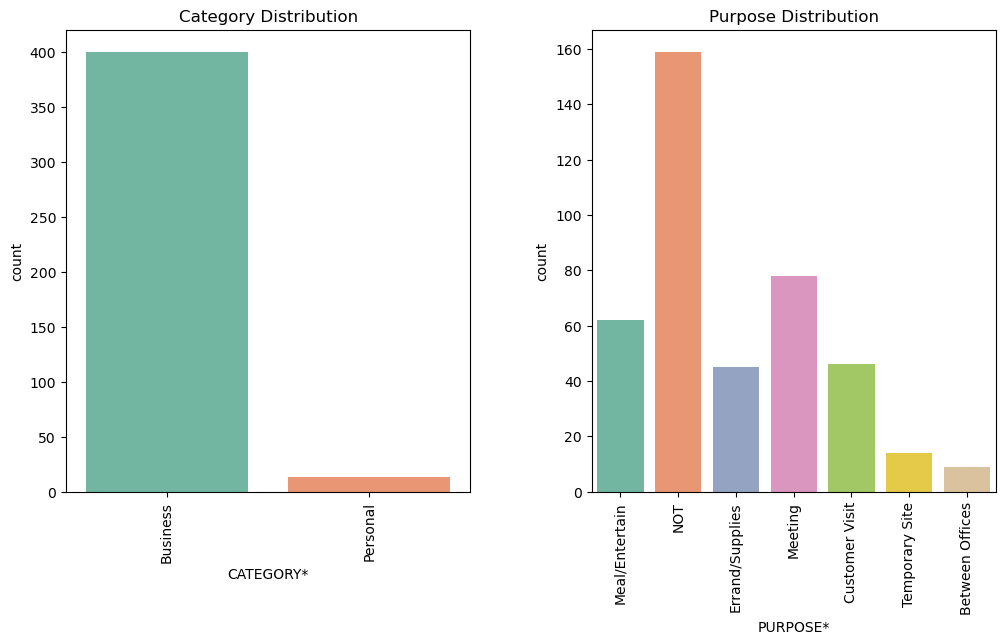

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure with a specified size
plt.figure(figsize=(12, 6))

# Create the first subplot
plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x='CATEGORY*', palette='Set2')  # You can use different color palettes
plt.xticks(rotation=90)
plt.title('Category Distribution')

# Create the second subplot
plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x='PURPOSE*', palette='Set2')  # You can use different color palettes
plt.xticks(rotation=90)
plt.title('Purpose Distribution')

# Adjust the space between the two subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


C:\Users\Nikita\AppData\Local\Temp\ipykernel_8060\1855265731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['Day-Night'], palette="Set2")  # Using a Seaborn palette (e.g., "Set2")


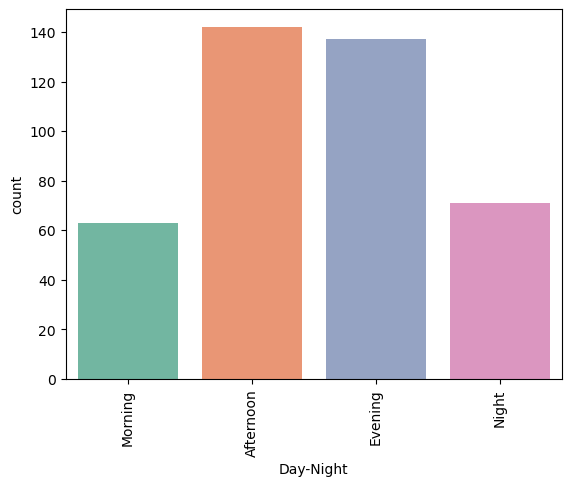

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named `dataset` and the column you're interested in is 'day-night'
sns.countplot(x=dataset['Day-Night'], palette="Set2")  # Using a Seaborn palette (e.g., "Set2")

# To rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


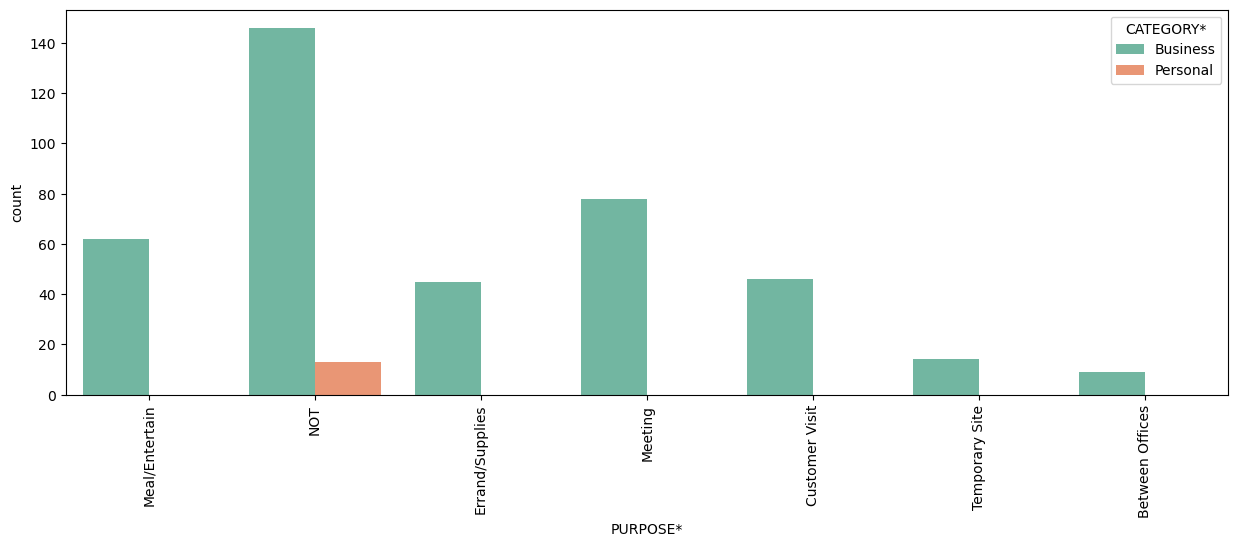

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE*', hue='CATEGORY*', palette='Set2')  
plt.xticks(rotation=90)
plt.show()



In [53]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
object_cols = ['CATEGORY*', 'PURPOSE*']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
dataset = pd.concat([dataset, OH_cols], axis=1)
dataset.head()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Date,Time,Day-Night,0,1,2,3,4,5,6,7,8
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

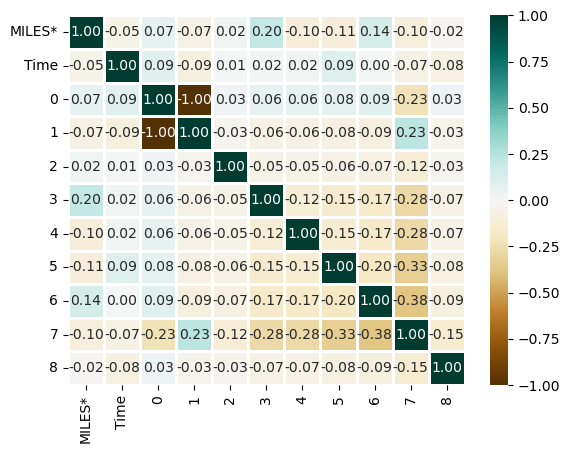

In [55]:
# Select only numerical columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(), 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)




In [61]:
print(dataset.columns)

Index(['START_DATE*',   'END_DATE*',   'CATEGORY*',      'START*',
             'STOP*',      'MILES*',    'PURPOSE*',        'Date',
              'Time',   'Day-Night',             0,             1,
                   2,             3,             4,             5,
                   6,             7,             8,       'MONTH'],
      dtype='object')


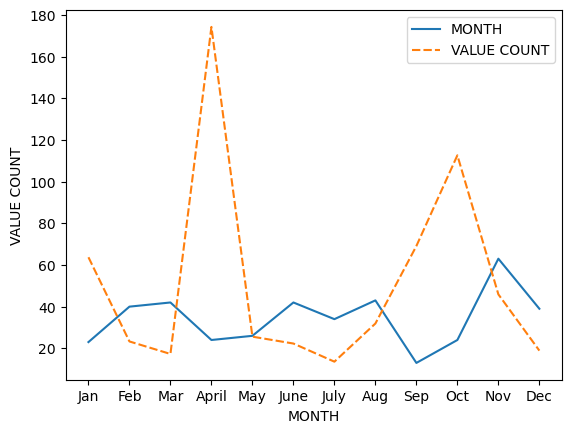

In [65]:

mon = dataset.MONTH.value_counts(sort=False)


df = pd.DataFrame({
    "MONTH": mon.values,
    "VALUE COUNT": dataset.groupby('MONTH', sort=False)['MILES*'].max()
})


p = sns.lineplot(data=df)
p.set(xlabel="MONTH", ylabel="VALUE COUNT")


plt.show()


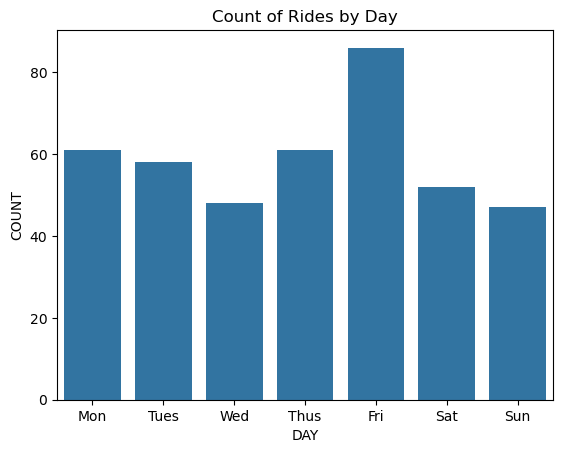

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already converted 'START_DATE*' to datetime and added 'DAY_LABEL'
dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'], errors='coerce')
dataset['DAY'] = dataset['START_DATE*'].dt.weekday
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
dataset['DAY_LABEL'] = dataset['DAY'].map(day_label)

# Count the number of occurrences for each day
day_count = dataset['DAY'].value_counts().sort_index()

# Map the numeric values (0-6) to day names
day_names = [day_label[i] for i in day_count.index]

# Plotting the barplot
sns.barplot(x=day_names, y=day_count.values)
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.title('Count of Rides by Day')
plt.show()


<Axes: ylabel='MILES*'>

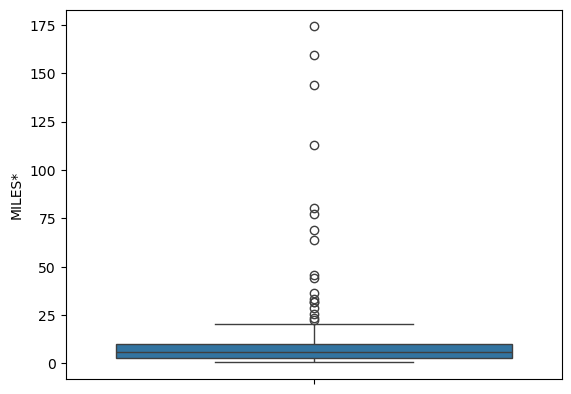

In [90]:
sns.boxplot(dataset['MILES*'])


<Axes: ylabel='MILES*'>

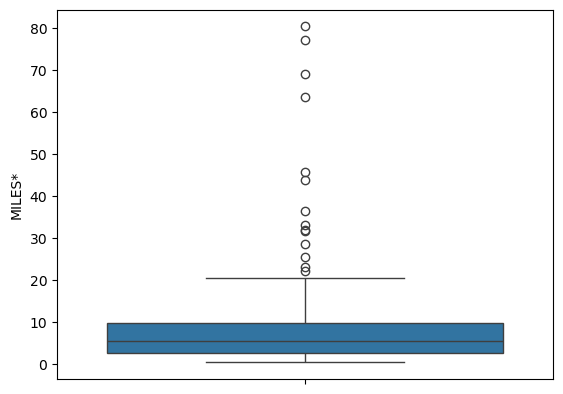

In [92]:
sns.boxplot(dataset[dataset['MILES*']<100]['MILES*'])

C:\Users\Nikita\AppData\Local\Temp\ipykernel_8060\532859975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES*']<40]['MILES*'])


<Axes: xlabel='MILES*', ylabel='Density'>

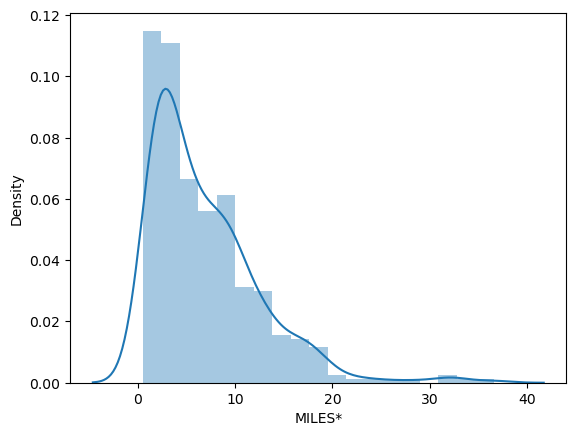

In [94]:
sns.distplot(dataset[dataset['MILES*']<40]['MILES*'])
